# Case Study to Cluster Countries in need of Aid
#### Problem Statement:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

We are using K-Means Clustering and Hierarchical Clustering to report back at least 5 countries which are in direst need of aid from the model.

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [3]:
# Importing dataset
country = pd.read_csv('Country-data.csv')

In [4]:
# Exploring the top 5 rows of the dataset
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Exploring shape of the dataset
country.shape

(167, 10)

In [6]:
# Exploring columns of the dataset
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Data Cleaning

In [7]:
# Checking for missing value % in all columns
(country.isnull().sum()/len(country))*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

##### Inference:
No missing values are present, so data treatment is not required.

In [8]:
# Checking for the datatypes of the columns
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

##### Inference:
None of the columns have incorrect datatype, so no conversion is required.

#### Since the data in the columns exports, health and imports are given as percentage of GDP per capita. So converting these columns to contain correct value.

In [9]:
# Converting the columns exports, health and imports to absolute values
col = ['exports', 'health', 'imports']
for i in col:
    country[i] = (country[i]/100)*country.gdpp
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Data Visualization

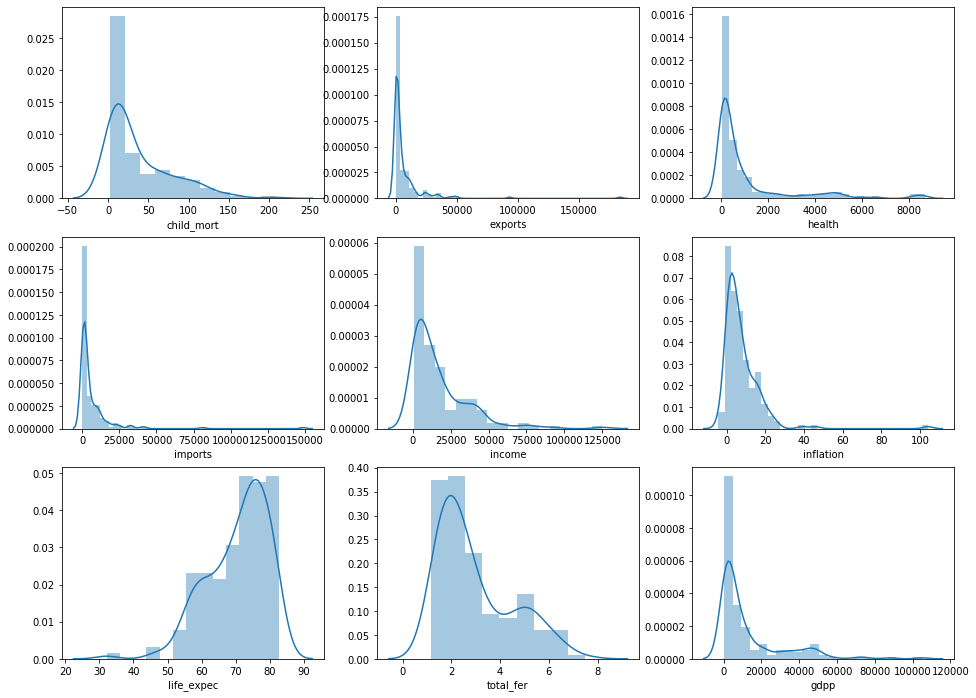

In [10]:
# Plotting Distplot to visualise the distribution of all the features
plt.figure(figsize=(16,12))
col=country.columns[1:]
for feature in enumerate(col):
    plt.subplot(3,3,feature[0]+1)
    sns.distplot(country[feature[1]])

##### Inference:
Looking at the distribution of the features, we can conclude that
- The features exports, health, imports, inflation have a normal distribution and there are no groups. So, these features may not contribute much to forming clusters.
- The features child_mort, income, life_expec, total_fer, gdpp had groups already formed in the data and they will be very helpful in forming clusters.

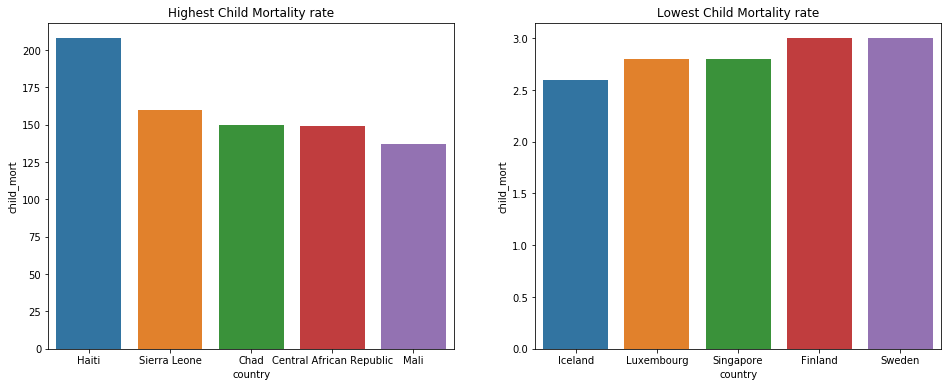

In [11]:
# Plotting the countries with Highest and lowest Child Mortality rate
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x="country", y="child_mort", data=country.sort_values("child_mort", ascending=False).head())
plt.title('Highest Child Mortality rate')
plt.subplot(1,2,2)
sns.barplot(x="country", y="child_mort", data=country.sort_values("child_mort").head())
plt.title('Lowest Child Mortality rate')
plt.show()

##### Inference:
From the above plots we can infer that 
- Haiti is the country having the highest Child Mortality rate index
- Iceland is the country having the lowest Child Mortality rate index

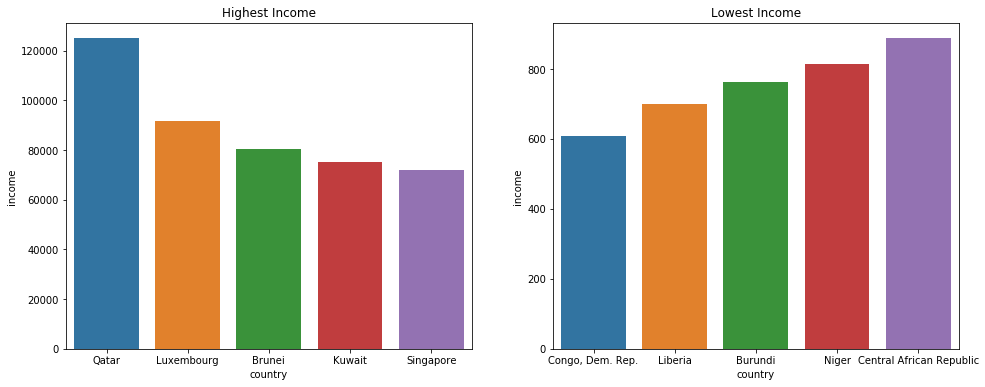

In [12]:
# Plotting the countries with Highest and lowest income
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x="country", y="income", data=country.sort_values("income", ascending=False).head())
plt.title('Highest Income')
plt.subplot(1,2,2)
sns.barplot(x="country", y="income", data=country.sort_values("income").head())
plt.title('Lowest Income')
plt.show()

##### Inference:
From the above plots we can infer that 
- Qatar is the country having the highest income per person
- Congo is the country having the lowest income per person

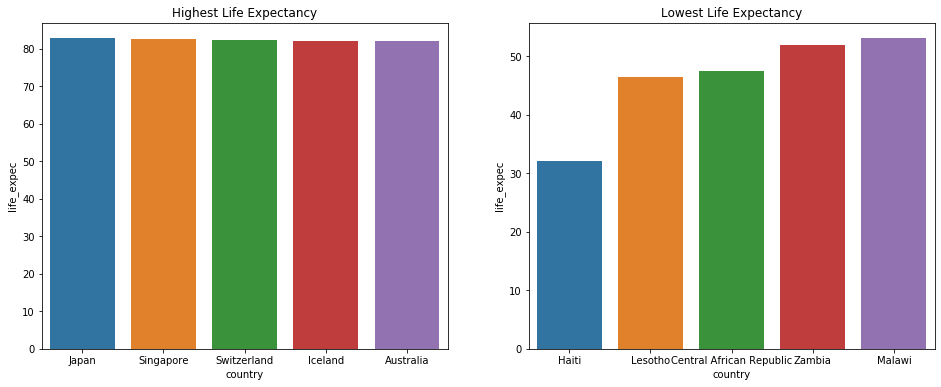

In [13]:
# Plotting the countries with Highest and lowest life Expectancy
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x="country", y="life_expec", data=country.sort_values("life_expec", ascending=False).head())
plt.title('Highest Life Expectancy')
plt.subplot(1,2,2)
sns.barplot(x="country", y="life_expec", data=country.sort_values("life_expec").head())
plt.title('Lowest Life Expectancy')
plt.show()

##### Inference:
From the above plots we can infer that 
- Japan, Singapore, Switzerland, Iceland & Australia are the countries having the highest and almost the same life expectancy 
- Haiti is the country having the lowest life expectancy

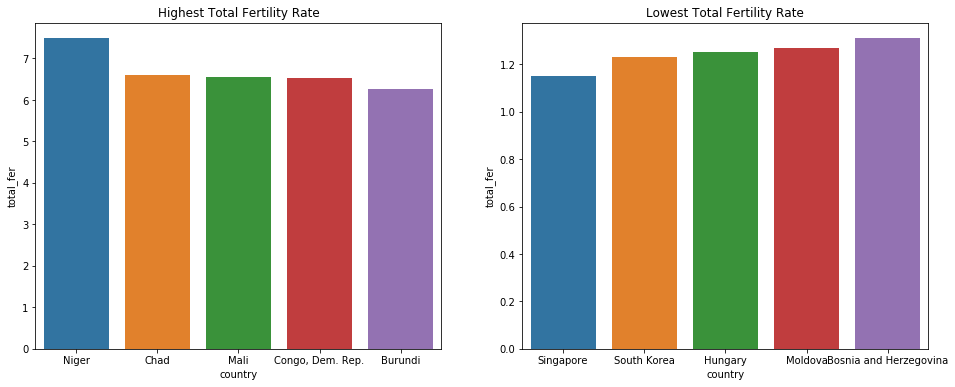

In [14]:
# Plotting the countries with Highest and lowest Total Fertility rate
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x="country", y="total_fer", data=country.sort_values("total_fer", ascending=False).head())
plt.title('Highest Total Fertility Rate')
plt.subplot(1,2,2)
sns.barplot(x="country", y="total_fer", data=country.sort_values("total_fer").head())
plt.title('Lowest Total Fertility Rate')
plt.show()

##### Inference:
From the above plots we can infer that 
- Niger is the country having the highest Total Fertility rate
- Singapore is the country having the lowest Total Fertility rate

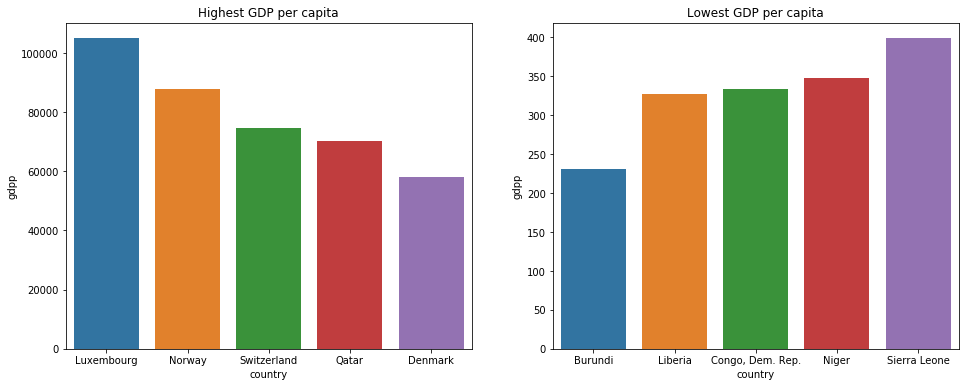

In [15]:
# Plotting the countries with Highest and lowest GDP per Capita
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x="country", y="gdpp", data=country.sort_values("gdpp", ascending=False).head())
plt.title('Highest GDP per capita')
plt.subplot(1,2,2)
sns.barplot(x="country", y="gdpp", data=country.sort_values("gdpp").head())
plt.title('Lowest GDP per capita')
plt.show()

##### Inference:
From the above plots we can infer that 
- Luxembourg is the country having the highest GDP per capita
- Burundi is the country having the lowest GDP per capita

#### Outlier Treatment

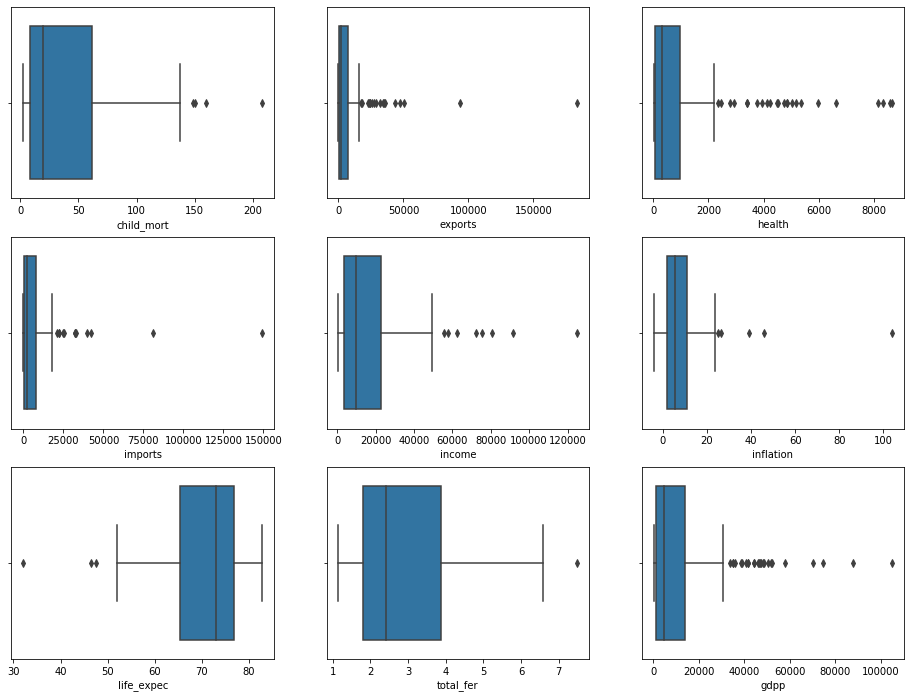

In [16]:
# Plotting box plot for all the columns to find any outliers
plt.figure(figsize=(16,12))
col=country.columns[1:]
for feature in enumerate(col):
    plt.subplot(3,3,feature[0]+1)
    sns.boxplot(country[feature[1]])

##### Inference:
From the above range of plots, we could find the below
- There are significant number of outliers in all the columns but we will avoid dropping the outliers because the dataset has very limited number of observations and the case study is to find countries in need of AID, and dropping any row may affect the results of our analysis. So, we will perform capping on the required outliers. 
- The columns child_mort, inflation and total_fer have outliers only in the upper range, but the upper range values are important for our analysis as it means those countries may be in the need of AID. If there were any outliers in lower range for these fields, we would have treated them, but for the upper range outliers we will keep as it is.
- The column life_expec had outliers only in the lower range, but it means these countries have very low life expectancy, and they may be in the need of AID. So, we will keep this column as it is.
- The remaining columns exports, health, imports, income & gdpp have outliers in upper range, which means that they have a very low chance of being in need of AID, but we will not drop them as we are not completely sure. So, we will apply capping on the upper range for these columns.

In [17]:
# Outlier treatment for exports, health, imports, income, gdpp
col=['exports', 'health', 'imports', 'income', 'gdpp']
for feature in col:
    Q3=country[feature].quantile(0.95)
    country[feature][country[feature] >= Q3] = Q3

#### Hopkins : Cluster Tendency

In [18]:
# Calculating the Hopkins Statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [28]:
hopkins(country.drop("country", axis=1))

0.9294609761425516

##### Inference:
The Hopkins Statistic value has resulted to 0.92 which indicates that the data is very good for clustering and we are good to go ahead with the Clustering.

#### Scaling Data

In [29]:
# Scaling the dataframe

scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(country.drop("country", axis=1))

# Converting to dataframe
country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = country.columns[1:]
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312


#### Finding Optimal number of Clusters (k)

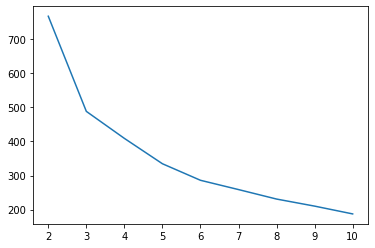

In [30]:
# elbow-curve/SSD
ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(country_scaled)
    ssd.append([k, kmeans.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

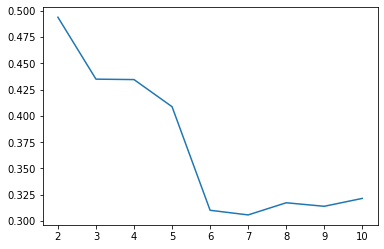

In [31]:
# silhouette analysis

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=100).fit(country_scaled)
    ss.append([k, silhouette_score(country_scaled, kmeans.labels_)])

sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])
plt.show()

##### Inference:
- According to the elbow-curve, the best value of k looks like to be 3
- According to the Silhouette Scores, the best value of k looks like to be 2, but 3 also has a high value and looking at both the curves, we can conclude to go with k=3.

### Model Building

#### KMEANS CLUSTERING

In [32]:
# final model with k=3
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [33]:
# Assigning the labels to the original dataframe
country['cluster_id'] = kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


In [34]:
# Checking number of data points in each cluster
country.cluster_id.value_counts()

0    85
2    45
1    37
Name: cluster_id, dtype: int64

##### Inference:
The cluster division looks good as there are significant number of data points in each cluster.

#### Cluster Profiling

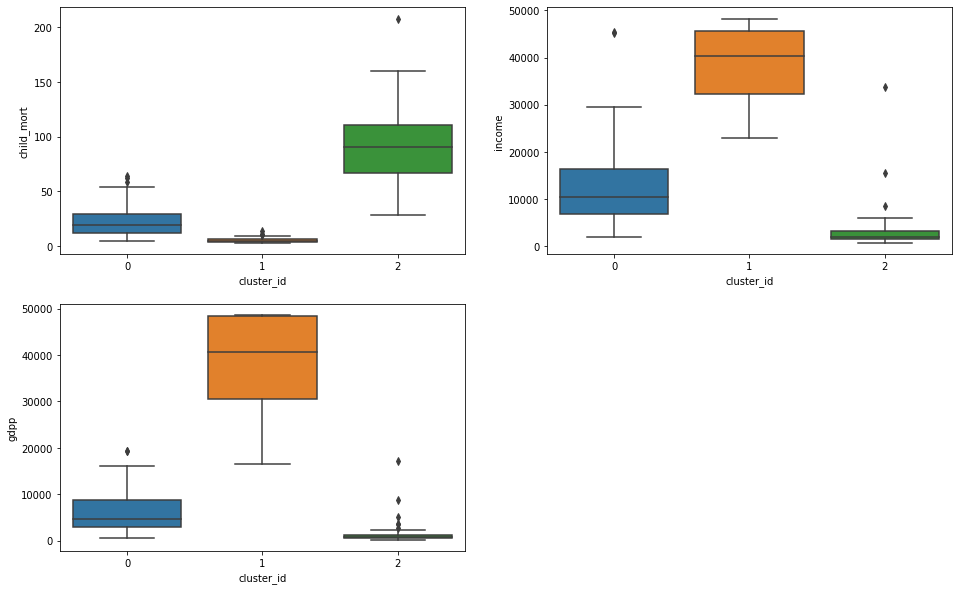

In [35]:
# Plotting the cluster_id vs child_mort/income/gdpp 
plt.figure(figsize=(16,10))
col=['child_mort','income','gdpp']
for feature in enumerate(col):
    plt.subplot(2,2,feature[0]+1)
    sns.boxplot(x='cluster_id', y=feature[1], data=country)

##### Inference:
From the above plots, we can conclude that
- Cluster 0 are the countries, which have significant income, GDP per capita & child mortality rate. Most number of countries lie in this cluster, i.e 85.
- Cluster 1 are the countries, which have a very high income & GDP per capita, and very low child mortality rate. There are 37 such countries.
- Cluster 2 are the countries, which have the lowest income & GDP per capita and high child mortality rate. There are 45 such countries and this cluster would be used for our analysis to pick 5 countries in need of AID.

In [36]:
# Finding the top 5 countries in need of AID from Cluster 2
aid_country_kmeans=country[country.cluster_id==2].sort_values(['gdpp', 'child_mort', 'income'], ascending=[True, False, True]).head()
aid_country_kmeans['country']

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

##### Inference:
From K-Means Clustering, we can conclude that the below countries are in direst need of AID
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

#### HIERARCHICAL CLUSTERING

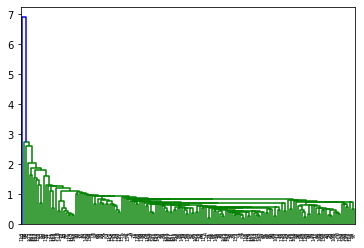

In [37]:
# single linkage
mergings = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

##### Inference:
The Dendrogram with Single linkage looks like very crowded and cannot take a decision on where to cut from. So, will look into the Complete linkage. 

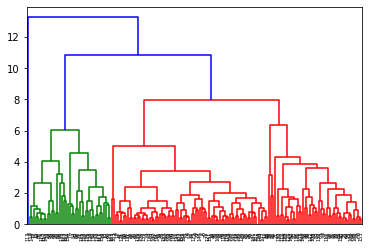

In [38]:
# complete linkage
mergings = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

##### Inference:
Looking at the Dendrogram for the Complete linkage, we can clearly see 3 or 4 clusters forming, and we will go ahead by cutting the tree for 4 clusters.

In [39]:
# Cutting the tree into 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )

In [40]:
# Assigning cluster labels to the original Dataframe
country['cluster_labels'] = cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0,1


In [41]:
# Checking number of data points in each cluster
country.cluster_labels.value_counts()

1    78
0    47
2    41
3     1
Name: cluster_labels, dtype: int64

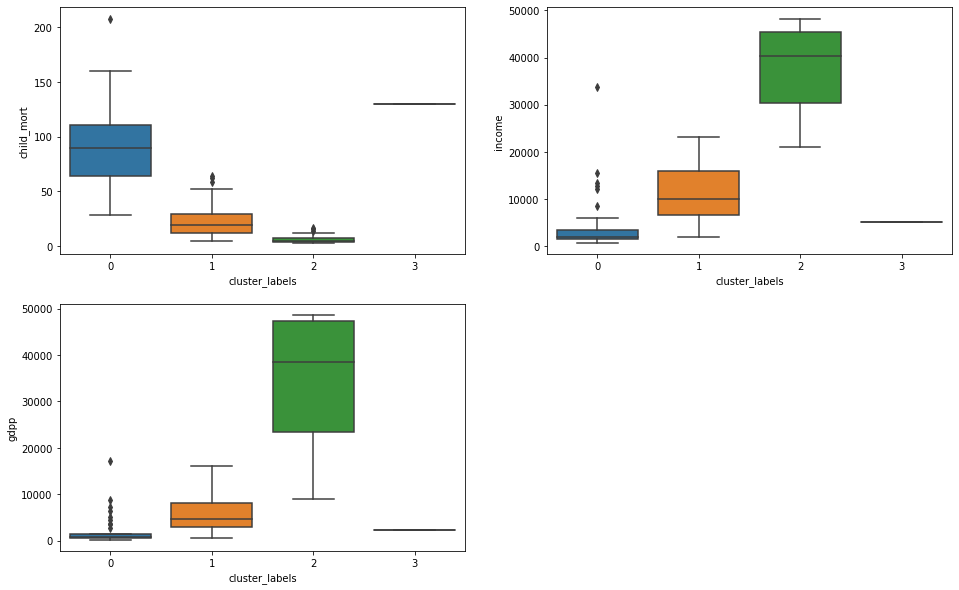

In [42]:
# Plotting the cluster_id vs child_mort/income/gdpp 
plt.figure(figsize=(16,10))
col=['child_mort','income','gdpp']
for feature in enumerate(col):
    plt.subplot(2,2,feature[0]+1)
    sns.boxplot(x='cluster_labels', y=feature[1], data=country)

##### Inference:
From the above plots, we can conclude that
- Cluster 1 are the countries, which have significant income, GDP per capita & child mortality rate. Most number of countries lie in this cluster, i.e 78.
- Cluster 2 are the countries, which have a very high income & GDP per capita, and very low child mortality rate. There are 41 such countries.
- Cluster 0 are the countries, which have the lowest income & GDP per capita and high child mortality rate. There are 47 such countries. Also, Cluster 3 has only 1 country and it also has a lower income and gdpp, but very high child mortality rate. So, we will use both Cluster 0 & 3, for our analysis to pick 5 countries in need of AID.

In [43]:
# Finding the top 5 countries in need of AID from Cluster 0 & 3
aid_country_hierarchical=country[(country.cluster_labels==0) | (country.cluster_labels==3)].sort_values(['gdpp', 'child_mort', 'income'], ascending=[True, False, True]).head()
aid_country_hierarchical['country']

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

##### Inference:
From hierarchical Clustering, we can conclude that the below countries are in direst need of AID
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

After the analysis of the countries using both K-Means Clustering and Hierarchical Clustering, we have got same top 5 countries in the need of AID.

### Recommendation:

From the Clustering, we can conclude that below 5 countires are in direst need of AID and HELP International can provide support to these countries to fight against poverty.
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone